In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA PREPROCESSING

In [4]:
gold_data = pd.read_csv('gld_price_data.csv')

In [5]:
gold_data = gold_data.drop(columns = 'Date', axis = 1)

In [6]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [8]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION

In [14]:
correlation = gold_data.corr()

<Axes: >

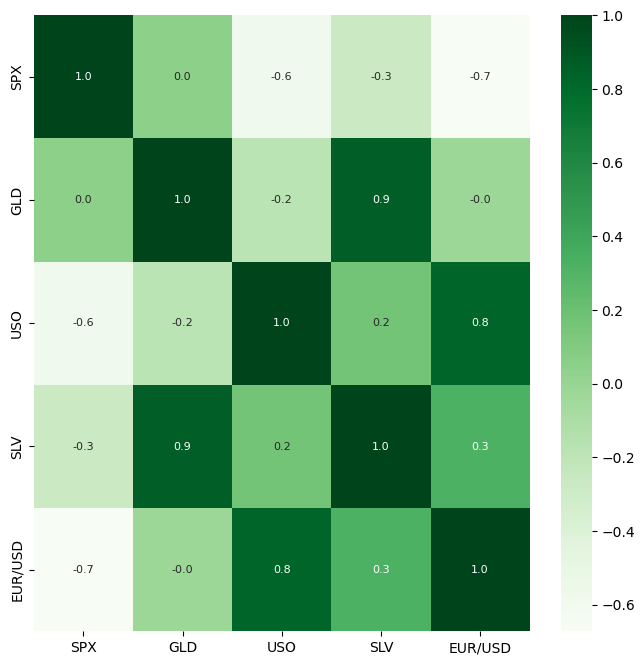

In [16]:
plt.figure(figsize = (8,8))
sb.heatmap(correlation, cbar = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Greens' )

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\garri\AppData\Local\Temp\ipykernel_15036\4031929058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

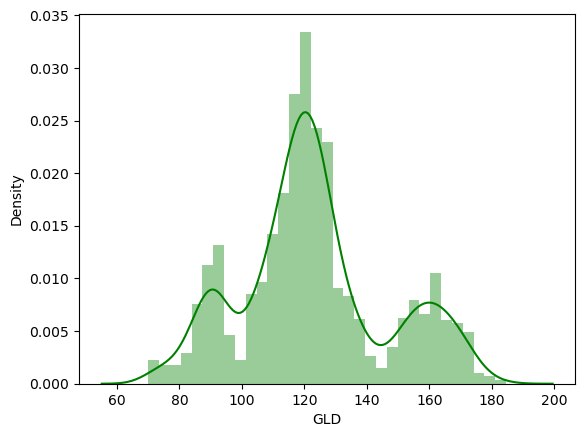

In [18]:
sb.distplot(gold_data['GLD'], color = 'green')

SPLITING FEATURES AND TARGET

In [19]:
x = gold_data.drop(['GLD'], axis = 1)
y = gold_data['GLD']

In [20]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [21]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

SPLITING INTO TEST DATA & TRAIN DATA

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

MODEL TRAINING - RANDDOM FOREST REGRESSOR

In [23]:
regressor = RandomForestRegressor(n_estimators = 100)

In [24]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

EVALUATION

In [25]:
#TEST DATA PREDICTION

In [26]:
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[113.00230038 148.96350064 143.10209914 112.60100181 113.67999933
  95.58459948 111.77849977  93.51470012 120.45970066 127.2864001
 147.77859989 120.48089903 119.156501    88.11720037  96.1942003
  92.7473987  116.58390031  89.0892988  125.46780149 114.86670033
 119.36879949 152.75110263 122.67789787 119.88429955 171.26290016
 108.13759867 120.71650121  87.30049852  88.03380056  88.34949894
 121.56130022 154.55020119 148.33839875 126.40059955 126.38890054
  90.88819904 159.13100022 121.48750135 106.74770085 144.12509698
  92.67919957 127.5368009  117.54600093 152.73210104 119.4577996
  91.44520179  77.96220029 120.21460194 132.025401   119.0257988
 127.21570044 165.65610107 153.75680094  92.63089962 148.56520026
 152.59519859 113.07860109 112.96610042  86.88609891 127.56890012
 125.21490142 151.7695031  114.15259996 110.71689988 160.81439746
 117.1765988  108.58240133 131.96329977 132.02110244 125.49140022
 116.93480023 149.41270211 156.05690017 168.96639506 109.88110082
 140.96069798 

In [27]:
#R SQUARED ERROR

In [29]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.9923592324615453


In [30]:
#COMPARISION BETWEEN PREDICTED AND ACTUAL

In [32]:
y_test = list(y_test)

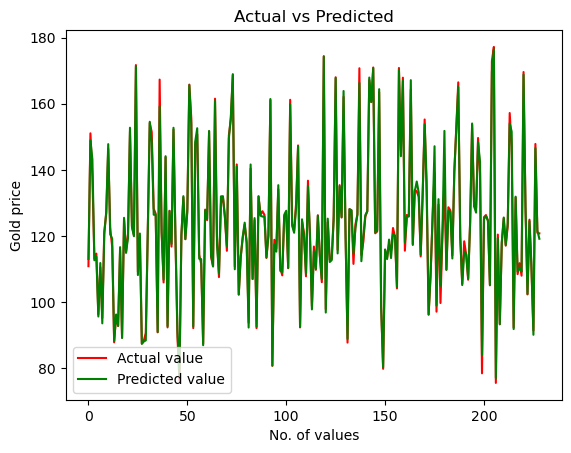

In [38]:
plt.plot(y_test, color = 'red', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title('Actual vs Predicted')
plt.xlabel('No. of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()